In [41]:
#第一类勒索病毒恶意软件EDA
#特点：在数据中找到体现，注册表、读写文件，以及加密函数（频次不高），调用api top10
import pandas as pd
data_df1=pd.read_csv('label1.csv')

In [42]:
data_df1.head()

,file_id,label,api,tid,return_value,index
0,503,1,InternetOpenA,2700,13369348,0
1,503,1,InternetOpenUrlA,2700,0,1
2,503,1,InternetCloseHandle,2700,1,2
3,503,1,InternetCloseHandle,2700,0,3
4,503,1,OpenSCManagerA,2700,12248408,4


In [43]:
api=data_df1['api'].value_counts()

In [44]:
api

RegQueryValueExW                  175638
NtClose                           144504
LdrGetProcedureAddress            132036
NtReadFile                         72638
RegOpenKeyExW                      56280
RegCloseKey                        56060
SetFilePointerEx                   47312
NtWriteFile                        39918
NtAllocateVirtualMemory            39273
GetSystemMetrics                   33397
LdrLoadDll                         30721
NtQuerySystemInformation           30255
LdrGetDllHandle                    26946
NtQueryDirectoryFile               25928
NtQueryValueKey                    25384
NtQueryInformationFile             21472
GetFileAttributesW                 21162
RegQueryValueExA                   18969
NtCreateFile                       18657
NtOpenKey                          18391
GetNativeSystemInfo                15090
LoadResource                       13250
NtDelayExecution                   12996
FindResourceExW                    12598
FindFirstFileExW

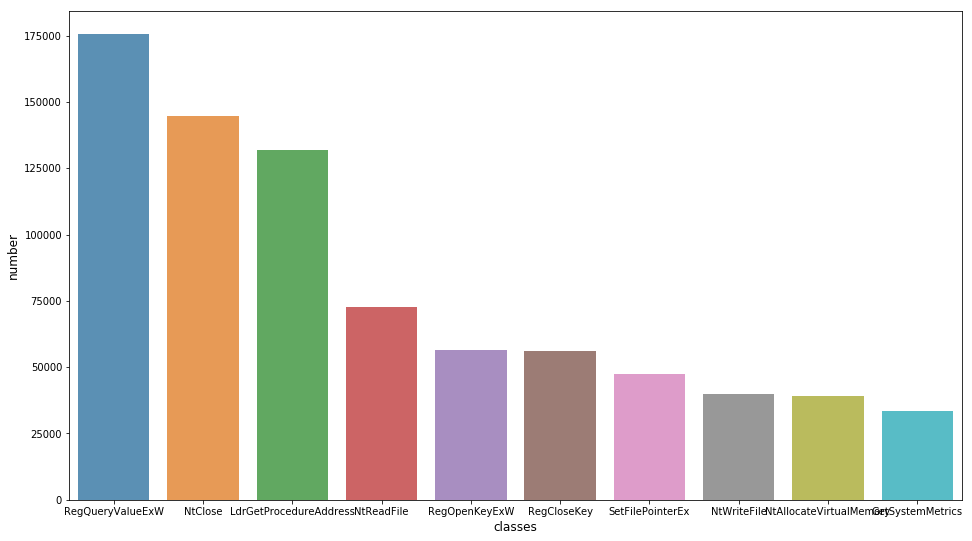

In [45]:
#所有文件中top api调用数量
#柱状图
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,9))
sns.barplot(api.index[0:10],api.values[0:10],alpha=0.8)
plt.xlabel("classes",fontsize = 12)
plt.ylabel("number",fontsize=12)
plt.show()

In [46]:
every_file=data_df1.groupby('file_id')['api'].count().sort_values(ascending=False)

In [47]:
every_file

file_id
5778      143664
28987     108896
85320      28776
25384      26687
49922      25499
77152      24996
6441       24597
12271      24464
47180      22873
78463      22856
94971      22846
76048      22845
79833      22824
52001      22818
86897      22333
80600      22174
73965      22169
110238     22116
90649      21558
105874     21461
75701      21265
42056      20939
110372     20845
15746      20685
110034     20425
6575       20424
111789     20424
14933      20004
96942      20004
47160      20004
           ...  
76049        308
78685        308
73966        308
30125        292
30231        292
6218         292
66663        292
106653       292
52259        292
28900        292
79473        231
36933        219
91471        219
83552        219
53438        219
103125        96
84139         77
106382        77
100211        77
95321         77
78656         73
83437         73
68958         73
9710          73
7714          73
42616         73
34945         73
30463 

In [48]:
import numpy
index=[]
for i in range(len(every_file)):
    index.append(i)
index=numpy.array(index)

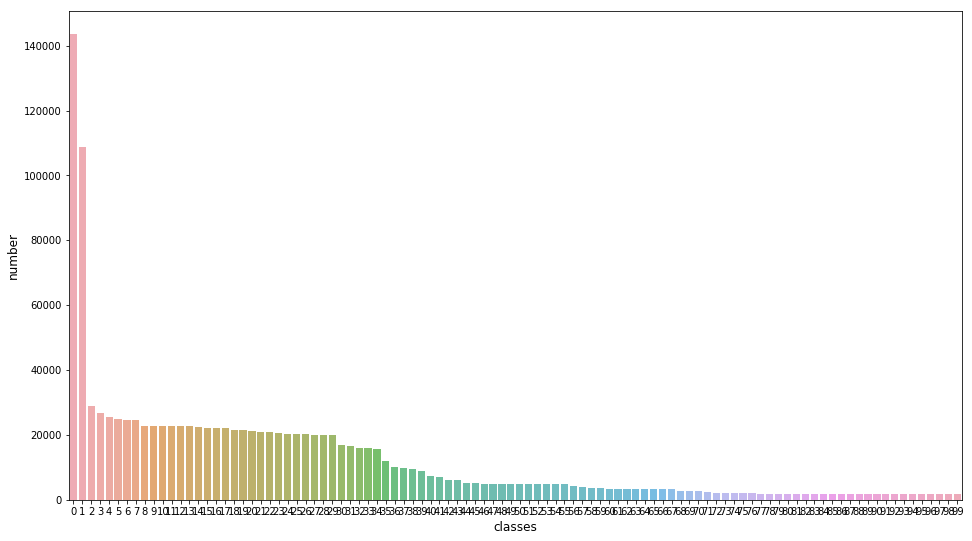

In [49]:
#每个文件调用api数量分布图，每个文件之间对比
#柱状图
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

plt.figure(figsize=(16,9))
sns.barplot(index[0:100],every_file.values[0:100],alpha=0.8)
plt.xlabel("classes",fontsize = 12)
plt.ylabel("number",fontsize=12)
plt.show()

/home/admin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


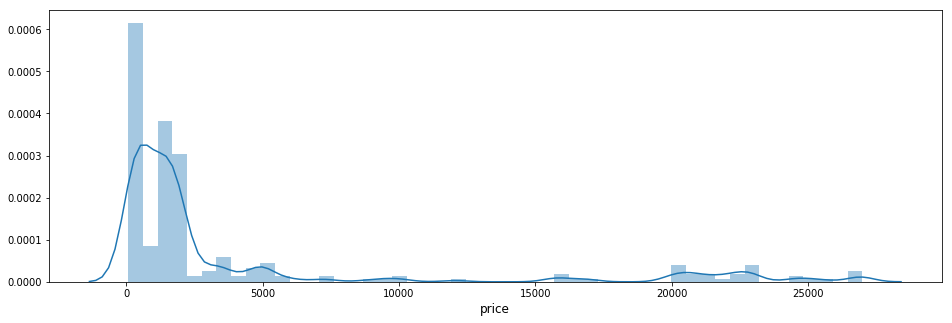

In [50]:
#文件调用api数量分布直方图
ulimit_start = numpy.percentile(every_file.values,1)
ulimit_end = numpy.percentile(every_file.values,99)
every_file.loc[[every_file.iloc[i]<ulimit_start for i in range(len(every_file))]]=ulimit_start
every_file.loc[[every_file.iloc[i]>ulimit_end for i in range(len(every_file))]]=ulimit_end
plt.figure(figsize=(16,5))
sns.distplot(every_file.values,bins=50,kde=True)
plt.xlabel('price',fontsize=12)
plt.show()

In [51]:
every_file[0:150]

file_id
5778      26979.46
28987     26979.46
85320     26979.46
25384     26687.00
49922     25499.00
77152     24996.00
6441      24597.00
12271     24464.00
47180     22873.00
78463     22856.00
94971     22846.00
76048     22845.00
79833     22824.00
52001     22818.00
86897     22333.00
80600     22174.00
73965     22169.00
110238    22116.00
90649     21558.00
105874    21461.00
75701     21265.00
42056     20939.00
110372    20845.00
15746     20685.00
110034    20425.00
6575      20424.00
111789    20424.00
14933     20004.00
96942     20004.00
47160     20004.00
            ...   
95729      1656.00
106618     1503.00
109230     1490.00
111380     1490.00
93730      1465.00
100212     1465.00
504        1452.00
55195      1444.00
17892      1442.00
111790     1442.00
87113      1442.00
43096      1441.00
52261      1438.00
93353      1429.00
107027     1428.00
8866       1425.00
28899      1423.00
115144     1423.00
47324      1423.00
1044       1422.00
15457      1421.00
9469

In [52]:
#第一个文件散点图
file_1=data_df1[data_df1['file_id']==503]

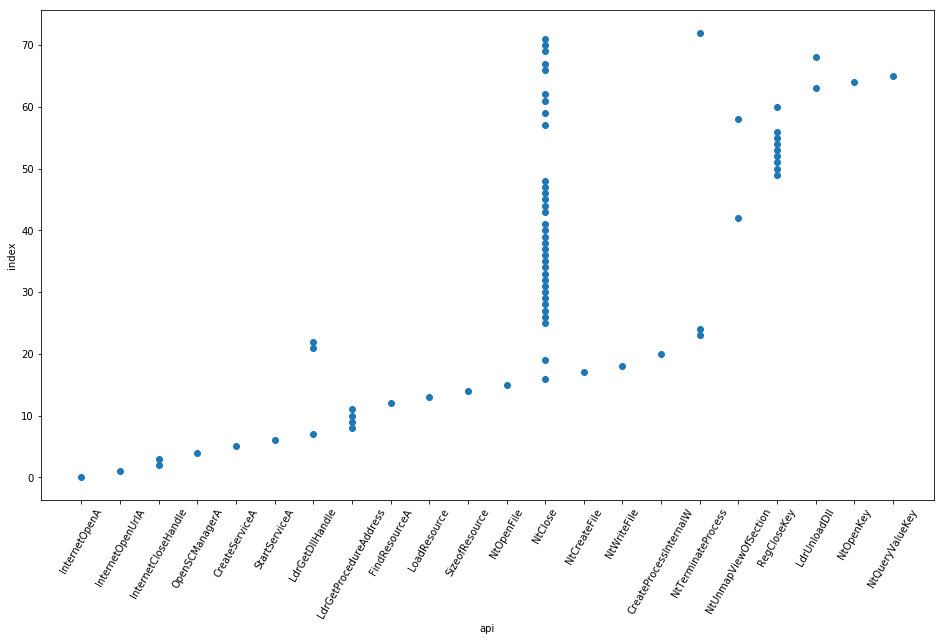

In [53]:
plt.figure(figsize=(16,9))
plt.scatter((file_1['api'].values),file_1['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

In [54]:
#第50%个文件散点图
file_2=data_df1[data_df1['file_id']==49235]
plt.figure(figsize=(16,9))
plt.scatter((file_2['api'].values),file_2['index']))
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

SyntaxError: invalid syntax (<ipython-input-54-2c4e069da464>, line 4)

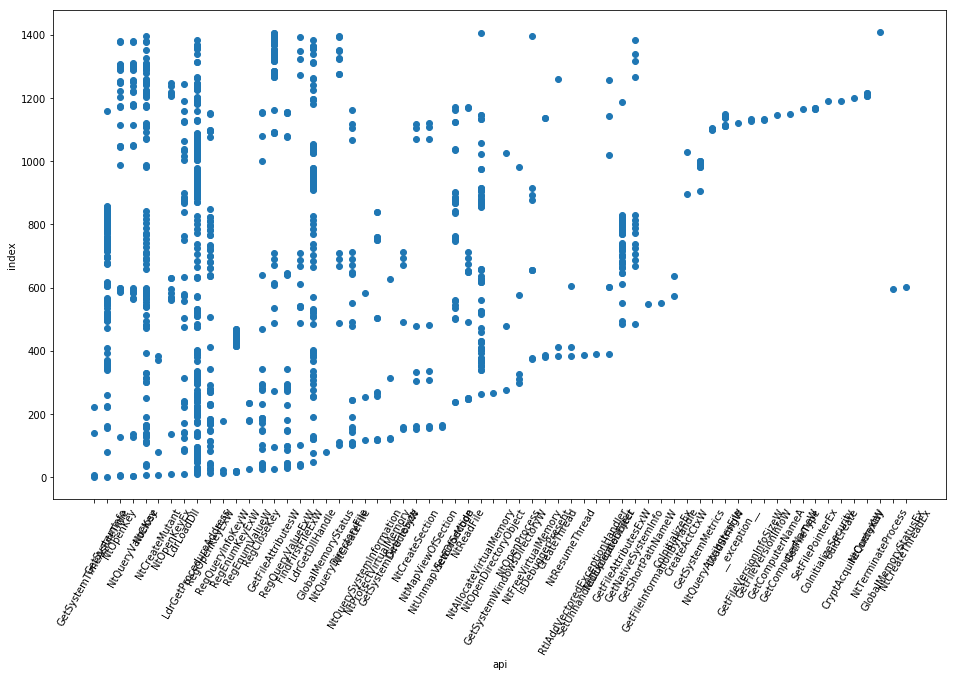

In [55]:
#第50%个文件散点图
file_4=data_df1[data_df1['file_id']==113208]
plt.figure(figsize=(16,9))

plt.scatter((file_4['api'].values),file_4['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()
    

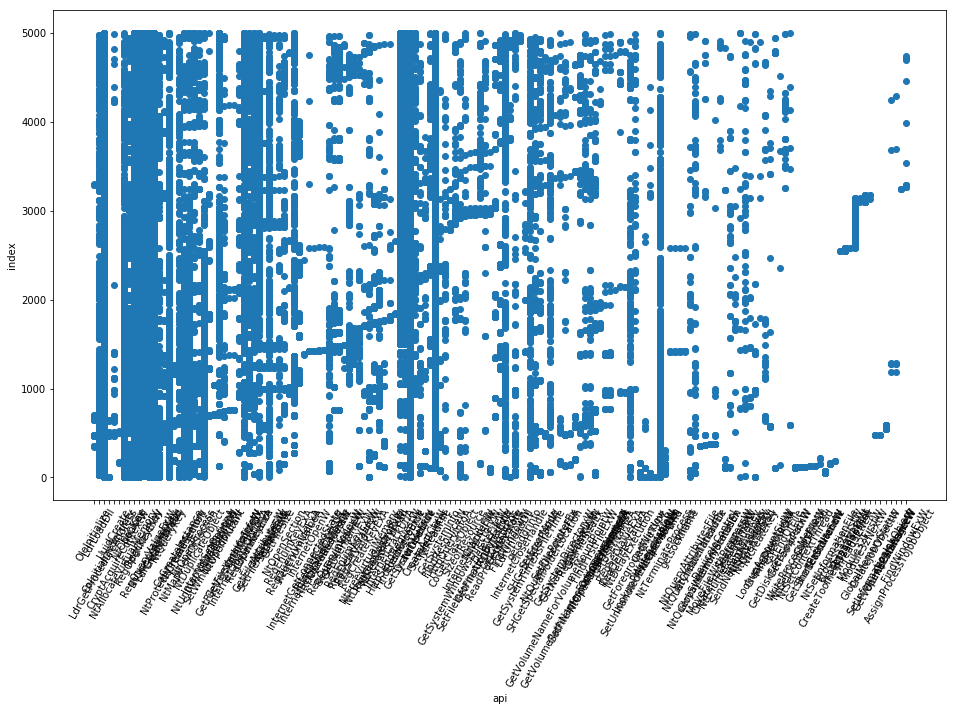

In [56]:
#第99%个文件散点图
file_3=data_df1[data_df1['file_id']==5778]
plt.figure(figsize=(16,9))
plt.scatter((file_3['api'].values),file_3['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

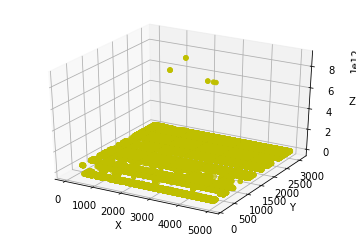

In [57]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df1[data_df1['file_id']==5778][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()


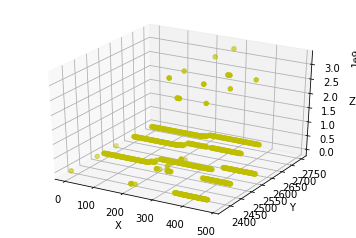

In [58]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df1[data_df1['file_id']==49235][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()

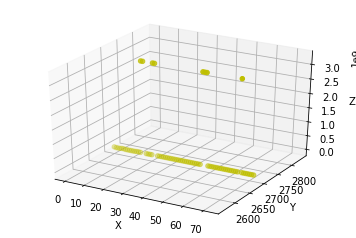

In [59]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df1[data_df1['file_id']==503][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()
